#01) Descriptive Analysis

In [22]:
import pandas as pd #Importing Libaries
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("/content/MKT.csv") #Importing the Dataset
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [3]:
df.shape #Checking number of lines (171) and columns (4)

(171, 4)

In [4]:
df.isnull().sum() #Checking for null values in the dataset

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [6]:
df.info()
#Checking Dtypes of the dataset - no alterations needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


#02) Exploratory Analysis

In [8]:
df.describe() #Statistical Metrics of the Dataset

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


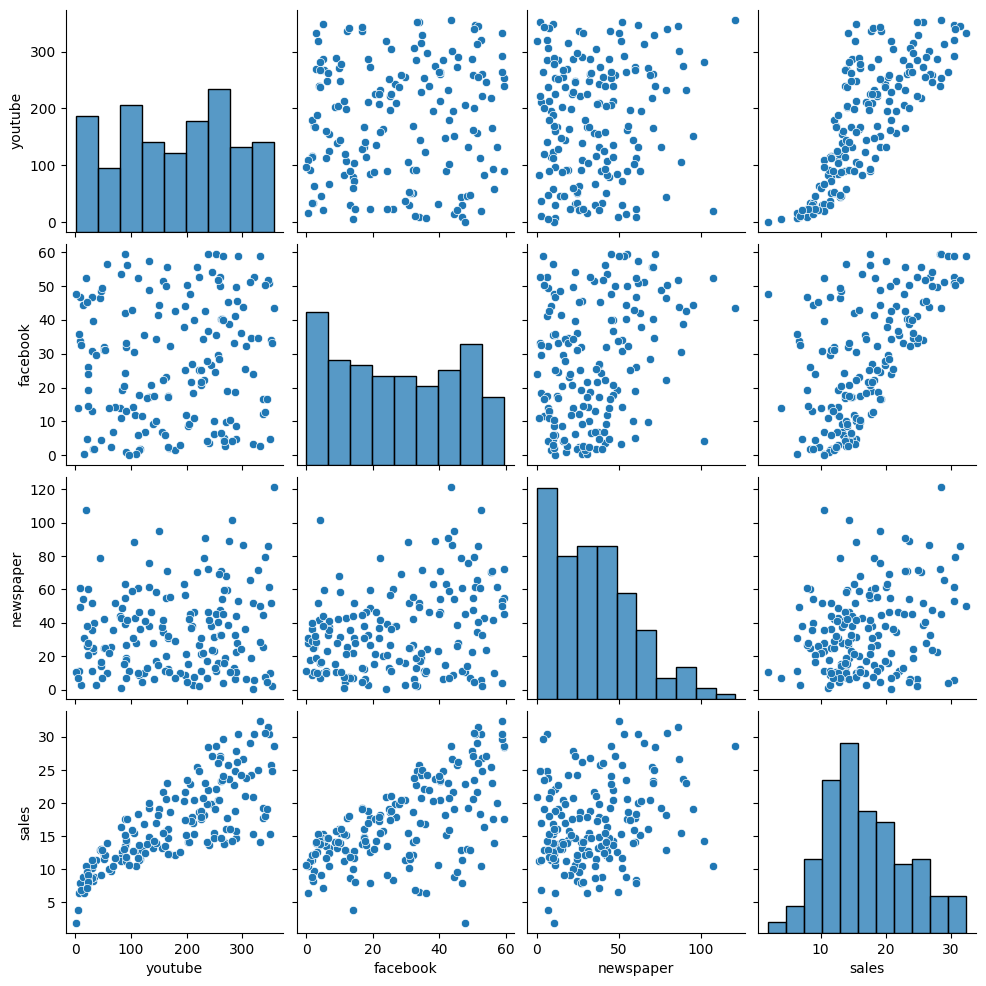

In [10]:
# Ploting the statistical linearity of the multiple variables in a pairplot.
# Facebook and Youtube have correlations closer to linear and the sales variable and are likely to have more influence over Sales than Newspaper.

sns.pairplot(df);

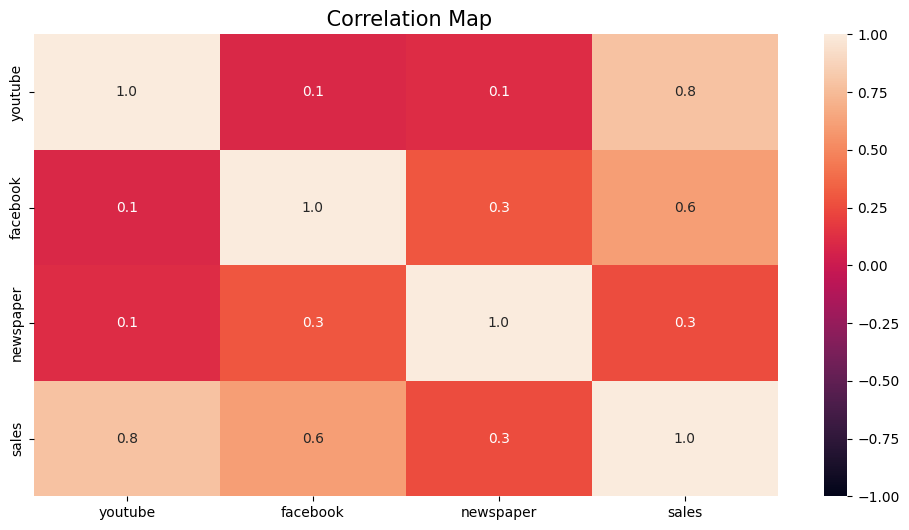

In [12]:
# Ploting a correlation heatmap for confirmation, we can confirm that social media have stronger influence over sales than newspaper, for this dataset.
# Interesting: None of the media channels have a negative effect over Sales.
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt= '.1f')
heatmap.set_title(' Correlation Map', fontdict={'fontsize':15}, pad=6);

#03) Data Modeling

In [13]:
#Importing Preprocessing Libaries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [24]:
# Choosing Sales as the target variable in Labels and removing it from the Dataset (df)
labels = pd.DataFrame(df, columns=['sales'])
df = df.drop('sales', axis=1)

In [25]:
#Train and Test Split. 20% for trainning.
train_df, test_df, train_labels, test_labels = train_test_split(df, labels, test_size=0.2, random_state=4)

In [26]:
print(df.shape, train_df.shape, test_df.shape)

(171, 3) (136, 3) (35, 3)


In [27]:
from sklearn.linear_model import LinearRegression #Importing Linear Regression Libary

In [28]:
ln = LinearRegression()

In [29]:
ln.fit(train_df, train_labels) #Training the model

LinearRegression()

In [30]:
pred = ln.predict(test_df) #Applying the model in the Test dataset

#04) Calculating the prediction


In [32]:
#Verifying model Accuracy with R2_score
from sklearn.metrics import r2_score
r = r2_score(test_labels,pred)
r_formatado = '{:.2f}'.format(r)
print('r2_score:', r_formatado) # IMPORTANT: the model will provide the correct value 90% of the time.

r2_score: 0.90


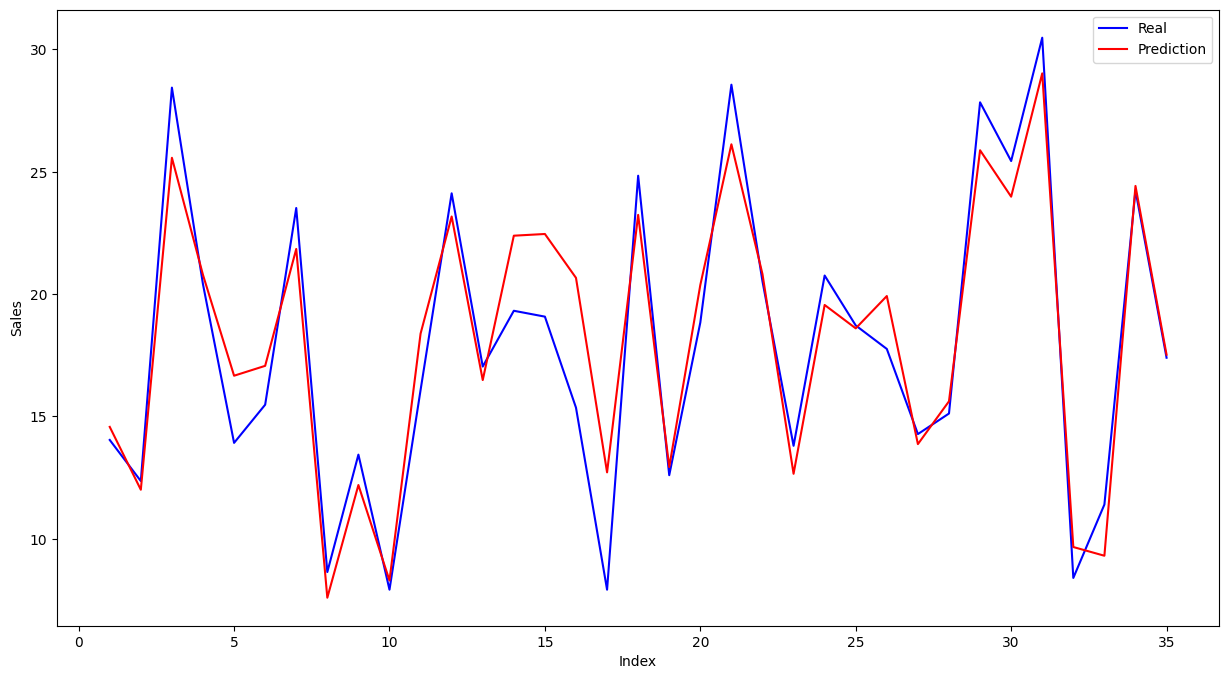

In [37]:
# Plotting the Predictions (red) versus the real results (blue) in the test dataset.
c = [i for i in range(1,36,1)]
fig = plt.figure(figsize=(15,8))
plt.plot(c,test_labels, color='blue', label='Real')
plt.plot(c,pred,color='red', label='Prediction');
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend();

#Use Example. Predicting a Sales Value


In the image below, the correct value of Sales in the dataset is 20.52

For testing, we will manually insert the variables spent with Youtube, Facebook and Newspaper and see how close our model can get to the real result.

Original Dataset Image:

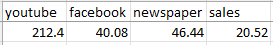


We can see that our model predicted 20.81 while the real result is 20.52, which is a very close and satisfactory result.

In [36]:
#youtube = 212.4
#facebook = 40.08
#newspaper = 46.44
input_data = (212.4,40.08,46.44)
imput_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = imput_data_as_numpy_array.reshape(1,-1)
sales_f = ln.predict(input_data_reshaped)[0]
#sales_formatado = '{:.2f}'.format(sales_f)
print('The Predicted Sales value will be: ',sales_f, 'And the real Sales value is 20.52')

The Predicted Sales value will be:  [20.81679742] And the real Sales value is 20.52


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
